## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization, and unit vector normalization in Python
* Identify appropriate normalization and scaling techniques for a given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables (`'RAD'` and `'TAX'`) and deleted the `'NOX'` (nitride oxide concentration) variable because it was highly correlated with two other features.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# First, create bins for RAD based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# First, create bins for TAX based on the values observed. 6 values will result in 5 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix='TAX', drop_first=True)
rad_dummy = pd.get_dummies(bins_rad, prefix='RAD', drop_first=True)
boston_features = boston_features.drop(['RAD', 'TAX'], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop('NOX', axis=1)

boston_features.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
0,0.00632,18.0,2.31,0.0,6.575,65.2,4.0900,15.3,396.90,4.98,0,0,0,1,0,0,0
1,0.02731,0.0,7.07,0.0,6.421,78.9,4.9671,17.8,396.90,9.14,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,7.185,61.1,4.9671,17.8,392.83,4.03,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,6.998,45.8,6.0622,18.7,394.63,2.94,0,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,7.147,54.2,6.0622,18.7,396.90,5.33,0,0,0,0,0,0,0


In [15]:
df = boston_features[['CRIM','ZN','INDUS','RM','AGE','DIS','PTRATIO','B','LSTAT']]
df.head()

,CRIM,ZN,INDUS,RM,AGE,DIS,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,6.575,65.2,4.0900,15.3,396.90,4.98
1,0.02731,0.0,7.07,6.421,78.9,4.9671,17.8,396.90,9.14
2,0.02729,0.0,7.07,7.185,61.1,4.9671,17.8,392.83,4.03
3,0.03237,0.0,2.18,6.998,45.8,6.0622,18.7,394.63,2.94
4,0.06905,0.0,2.18,7.147,54.2,6.0622,18.7,396.90,5.33


## Look at the histograms for the continuous variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C35AE85358>,
      dtype=object)

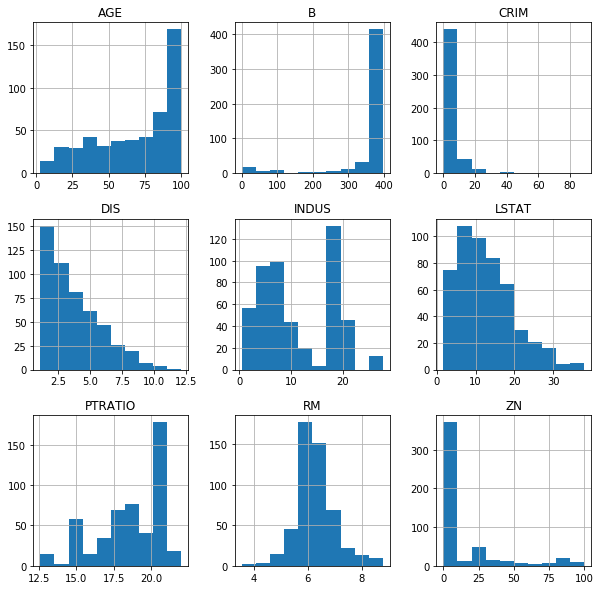

In [16]:
# Your code here
df.hist(figsize = (10,10))

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the `'ZN'` feature?  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C35F52D4E0>,
      dtype=object)

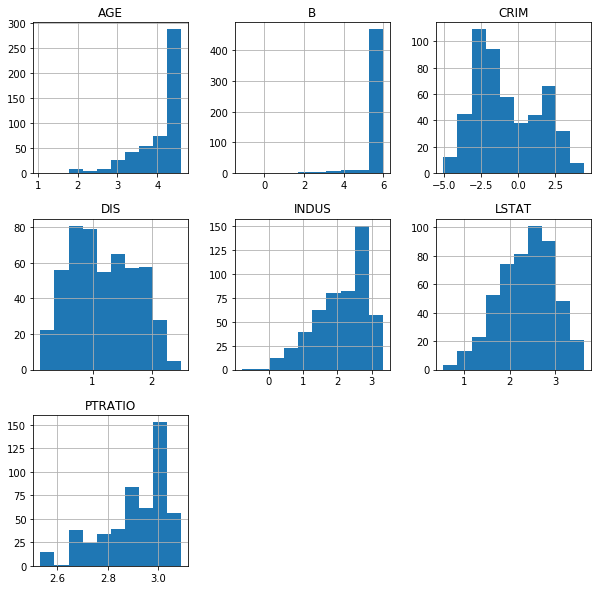

In [20]:
# Your code here
import numpy as np

df_log = pd.DataFrame([])
for col in ['AGE','B','CRIM','DIS','INDUS','LSTAT','PTRATIO']:
    df_log[col] = np.log(df[col])
df_log.hist(figsize = (10,10))

`'ZN'` has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [18]:
# Your code here
df_log['ZN'] = np.log(df['ZN'])
df['ZN'].describe()

C:\Users\Devin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

## Try different types of transformations on the continuous variables

Store your final features in a DataFrame `features_final`: 

In [ ]:
#Commentary on variables

#Toss out ZN as it is extremely 0-heavy
#Keep raw data for RM
#Keep log transforms of CRIM, DIS, INDUS, LSTAT, and PTRATIO

#Below is an attempt to write a function that, given a dataframe and column as inputs, 
#returns before-and-after shots of all transformations on that column

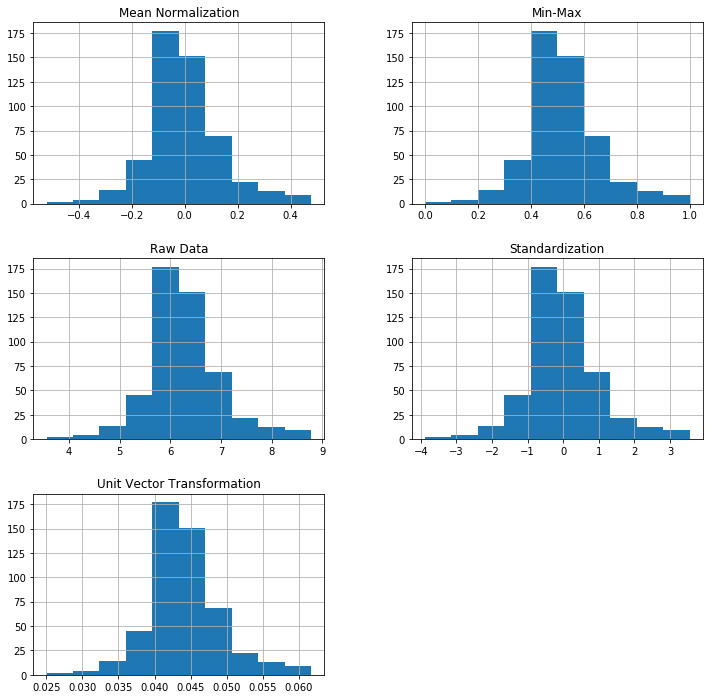

In [31]:
def show_transforms(df, col):
    transforms = pd.DataFrame([])
    transforms['Raw Data'] = df[col]
    transforms['Min-Max'] = (df[col] - min(df[col])) / (max(df[col]) - min(df[col]))
    transforms['Standardization'] = (df[col] - np.mean(df[col])) / np.std(df[col])
    transforms['Mean Normalization'] = (df[col] - np.mean(df[col])) / (max(df[col]) - min(df[col]))
    transforms['Unit Vector Transformation'] = df[col] / np.linalg.norm(df[col])
    transforms.hist(figsize=(12,12))

show_transforms(df, 'RM')

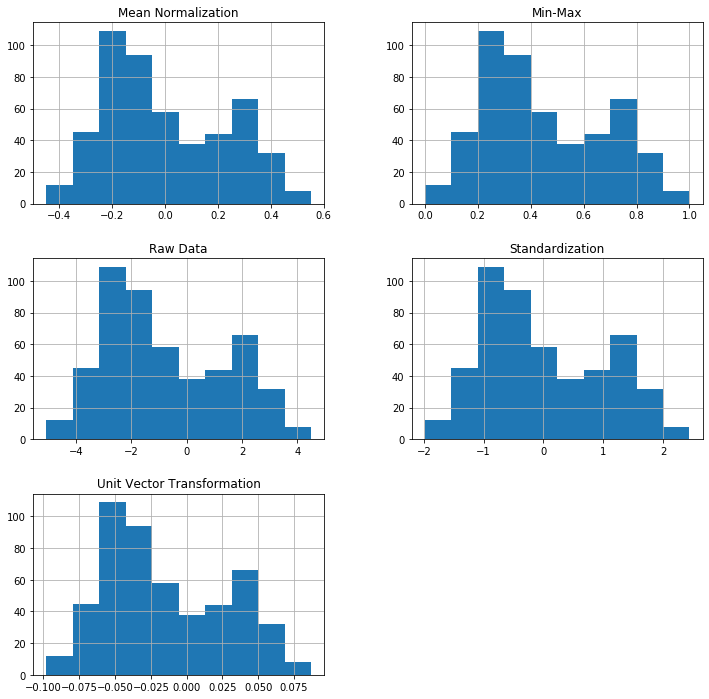

In [32]:
show_transforms(df_log, 'CRIM')

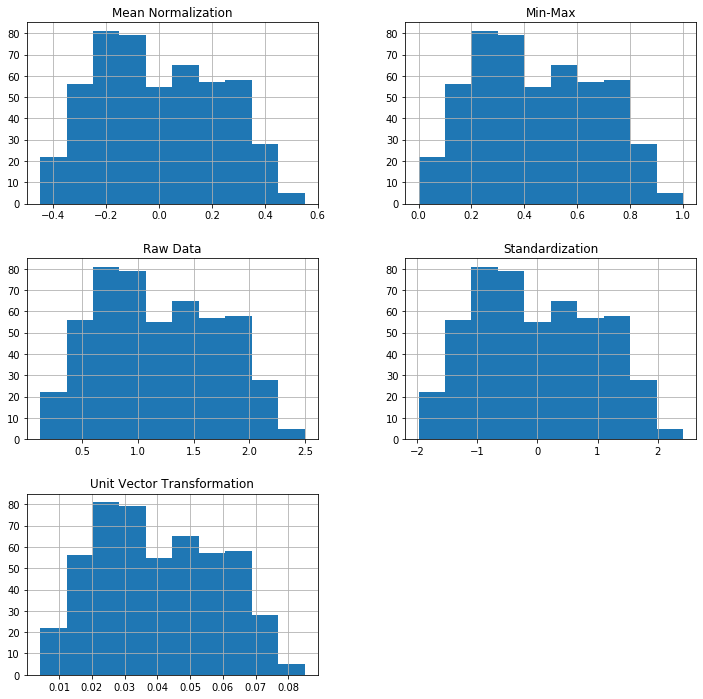

In [33]:
show_transforms(df_log, 'DIS')

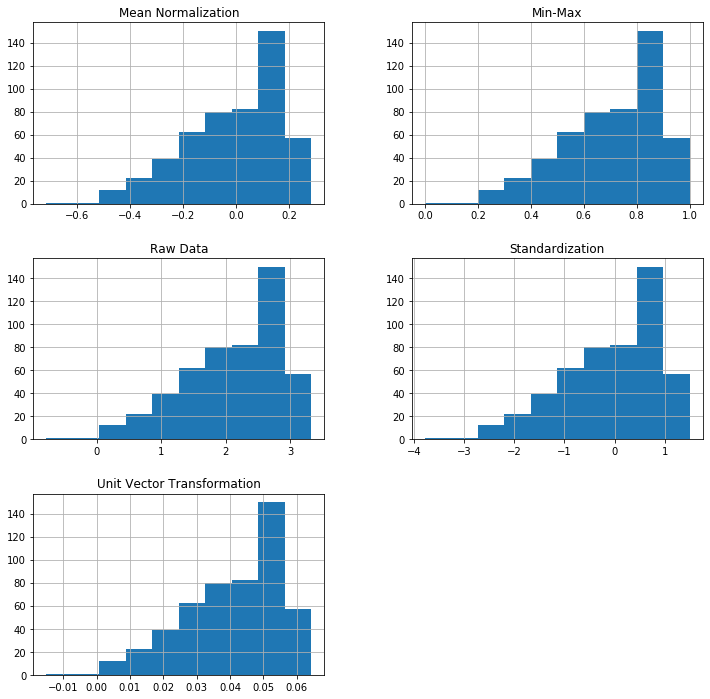

In [34]:
show_transforms(df_log, 'INDUS')

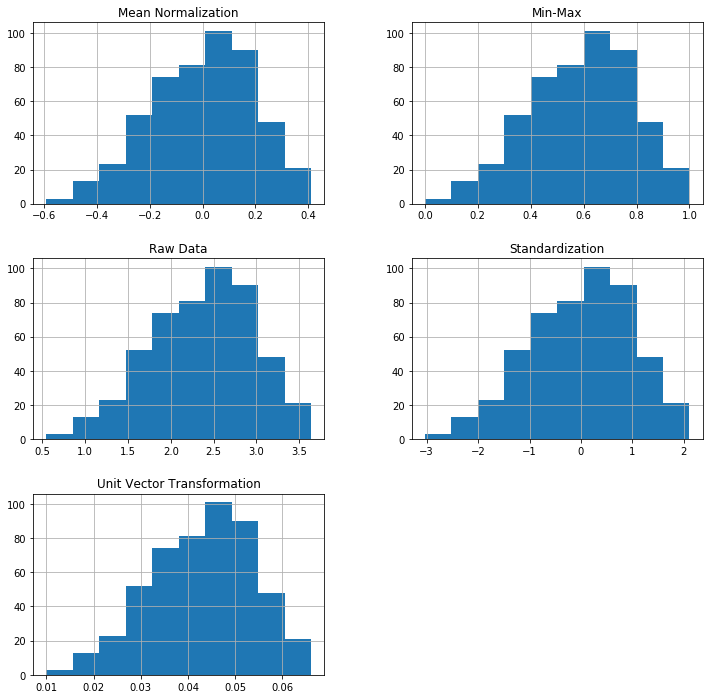

In [35]:
show_transforms(df_log, 'LSTAT')

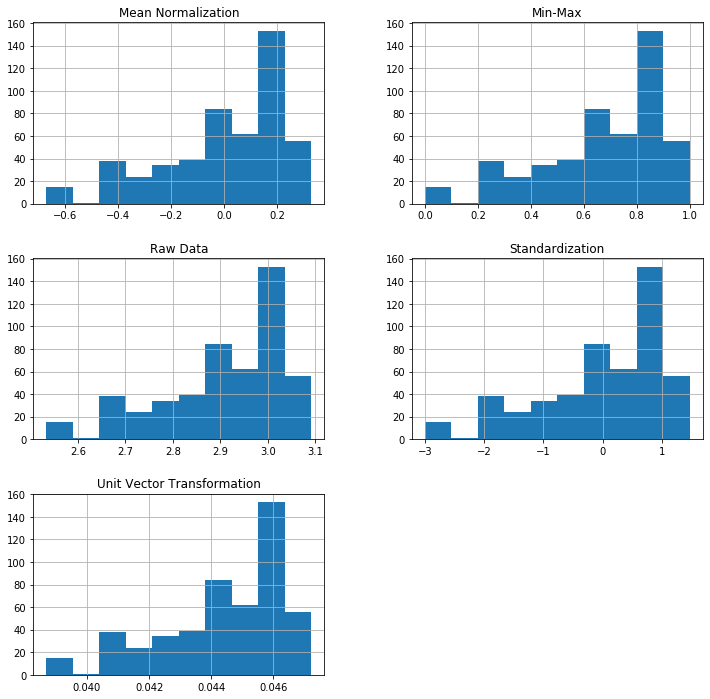

In [36]:
show_transforms(df_log, 'PTRATIO')

In [ ]:
# Your code here


## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` DataFrame.